Clone the repo

In [1]:
!git clone https://github.com/ne1s0n/drone2report.git

Cloning into 'drone2report'...
remote: Enumerating objects: 775, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 775 (delta 0), reused 0 (delta 0), pack-reused 770 (from 1)
Receiving objects: 100% (775/775), 7.02 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (494/494), done.


We want to run the example analysis encoded in `drone2report/examples/ini/RGB.ini`
Before that, however, we need to update the file paths to be coherent to the current folder structure in Colab. So the line:

`infolder=/home/nelson/research/drone2report/examples`

needs to become

`infolder=/content/drone2report/examples`

We'll do that via the `sed` command:

In [2]:
!sed -i 's|^infolder=/home/nelson/research/drone2report/examples|infolder=/content/drone2report/examples|' drone2report/examples/ini/RGB.ini

We can now run the example:

In [3]:
!python3 drone2report/drone2report.py drone2report/examples/ini/RGB.ini

Welcome to Drone2Report!
========================== DATASET SETUP ===========================

---------------------------
DATASET example_RGB
Opening image file /content/drone2report/examples/data/example_rgb.tiff
 - projection:  PROJCS["RDN2008 / UTM zone 32N (N-E)",GEOGCS["RDN2008",DATUM["Rete_Dinamica_Nazionale_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1132"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6706"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","6707"]]
 - geotransform:  minX= 570291.2631  xRes= 0.0032631241084214633  yRot= 0.0  minY= 4974995.6508  xRot= 0.0  yRes= -0.0032630268202459446
 - siz

We can now take a look at the results. We'll start with the original image. Notice that we highlight the ROI borders in red:

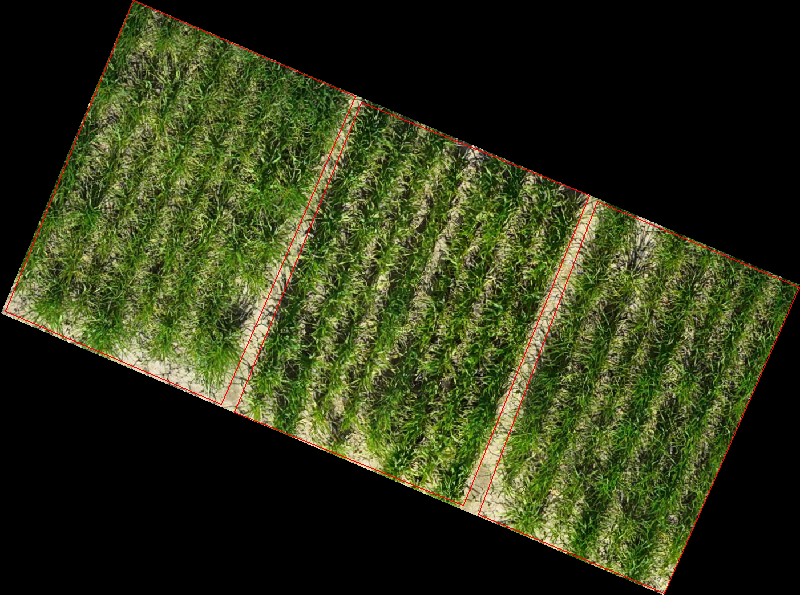

In [32]:
from IPython.display import Image, display

#the actual original image would be:
#img = '/content/drone2report/examples/data/example_rgb.tiff'
#but it's a tiff file. It's easier to visualize the .png copy, which is generated
#by the "thumbnail" task anyway

img = '/content/drone2report/examples/results/thresholds/example_RGB_redgreenblue.png'
display(Image(img))

The "thumbnail" task was set up in the .ini file to generate many copies of the original image with all pixels above a certain GLI threshold highlighted in cyan. Let's take a look:

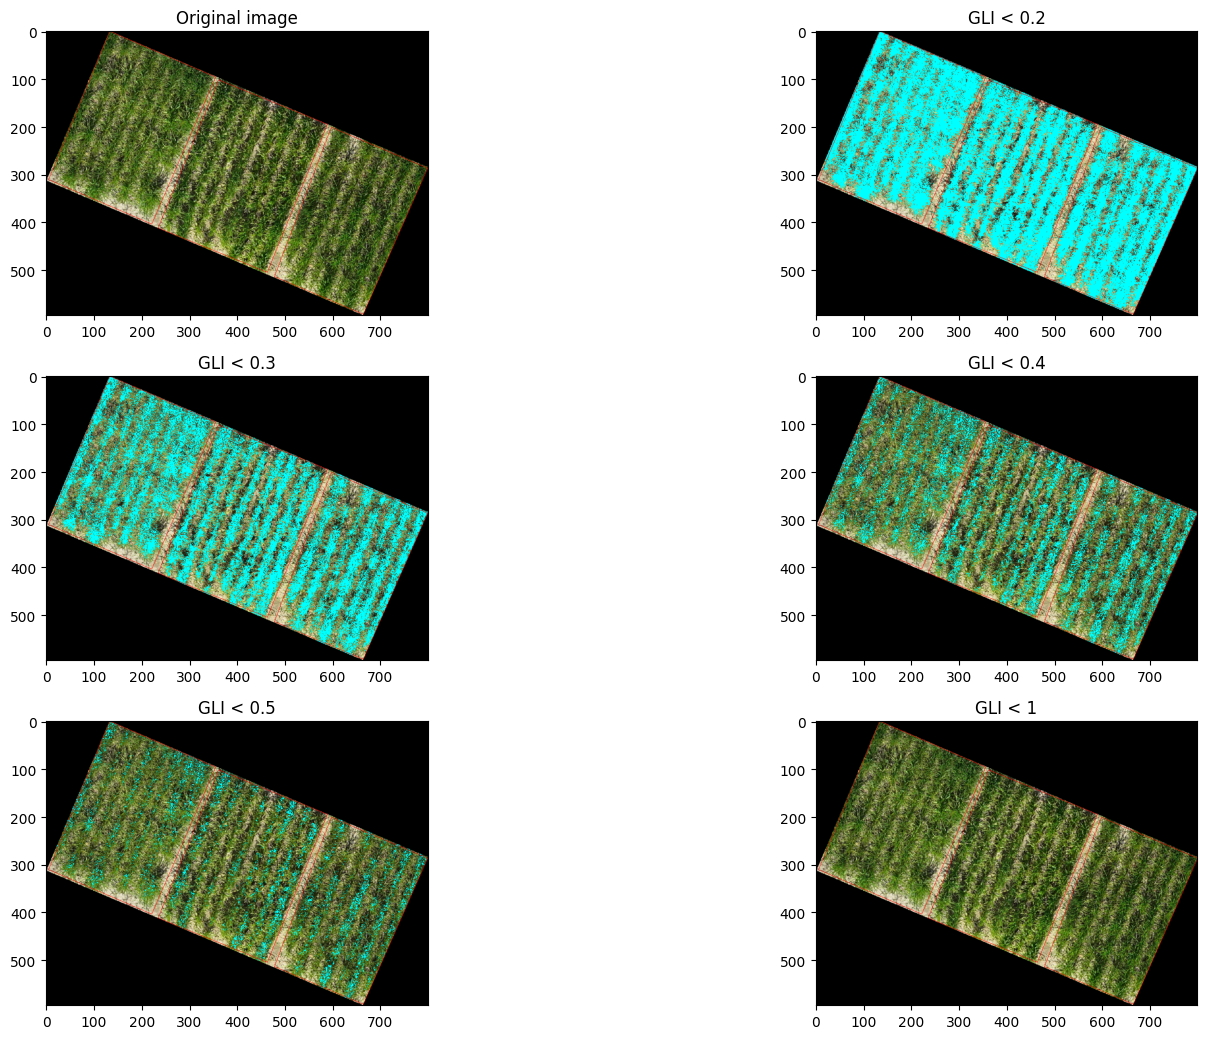

In [30]:
#this code block just displays six images side by side
import matplotlib.pyplot as plt

root_path ='/content/drone2report/examples/results/thresholds/'

img_paths = [
    root_path + 'example_RGB_redgreenblue.png',
    root_path + 'example_RGB_redgreenblue_indexGLI_threshold0.2.png',
    root_path + 'example_RGB_redgreenblue_indexGLI_threshold0.3.png',
    root_path + 'example_RGB_redgreenblue_indexGLI_threshold0.4.png',
    root_path + 'example_RGB_redgreenblue_indexGLI_threshold0.5.png',
    root_path + 'example_RGB_redgreenblue_indexGLI_threshold1.0.png'
]

img_titles = [
    "Original image",
    "GLI <= 0.2",
    "GLI <= 0.3",
    "GLI <= 0.4",
    "GLI <= 0.5",
    "GLI <= 1"
]

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.title.set_text(img_titles[0])
ax1.imshow(mpimg.imread(img_paths[0]))

ax2.title.set_text(img_titles[1])
ax2.imshow(mpimg.imread(img_paths[1]))

ax3.title.set_text(img_titles[2])
ax3.imshow(mpimg.imread(img_paths[2]))

ax4.title.set_text(img_titles[3])
ax4.imshow(mpimg.imread(img_paths[3]))

ax5.title.set_text(img_titles[4])
ax5.imshow(mpimg.imread(img_paths[4]))

ax6.title.set_text(img_titles[5])
ax6.imshow(mpimg.imread(img_paths[5]))

fig.set_size_inches(18.5, 10.5)
plt.tight_layout()
plt.show()

Here we computed the GLI index, but any index can be used (and any threshold can be set up).

We can also take a look at the tabular results after index computation:

In [33]:
import pandas as pd

infile = '/content/drone2report/examples/results/indexes/indexes_example_RGB.csv'
df = pd.read_csv(infile)
df

,type,dataset,ortho_files,shapes_file,channels,centroid_x,centroid_y,threshold,pixels,id,...,GLI_mean,GLI_median,GLI_std,GLI_max,GLI_min,VARIrgb_mean,VARIrgb_median,VARIrgb_std,VARIrgb_max,VARIrgb_min
0,tif_multichannel,example_RGB,/content/drone2report/examples/data/example_rg...,/content/drone2report/examples/shapefile/examp...,red green blue,570292.286036,4.974994e+06,NaN,736413,1,...,0.267976,0.255172,0.135790,0.972603,-0.013333,0.143395,0.125984,0.111751,1.333333,-0.247059
1,tif_multichannel,example_RGB,/content/drone2report/examples/data/example_rg...,/content/drone2report/examples/shapefile/examp...,red green blue,570293.618272,4.974994e+06,NaN,763446,2,...,0.268053,0.253589,0.147217,0.977528,-0.368421,0.132140,0.111111,0.129056,1.500000,-6.000000
2,tif_multichannel,example_RGB,/content/drone2report/examples/data/example_rg...,/content/drone2report/examples/shapefile/examp...,red green blue,570294.897490,4.974993e+06,NaN,650403,3,...,0.278702,0.264368,0.148869,0.969231,-0.200000,0.145615,0.120690,0.134914,1.666667,-0.500000
